In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [2]:
def plot_f(f, min_x, max_x):
    x_axis = np.linspace(min_x, max_x, 1000)
    fig, ax = plt.subplots()
    y_vals = [f(x) for x in x_axis]
    ax.plot(x_axis, y_vals, linewidth=3, label='f', c='b')
    
    plt.xticks(np.arange(min_x, max_x+1, 1))
    plt.yticks(np.arange(np.min(y_vals), np.max(y_vals)+1, 1))


    # set the spine locations
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')

    # turn off the top and right spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.grid(True, which='both')



    ax.legend()

In [3]:
def f(x):
    if x < 2:
        return 2
    elif x < 4:
        return x*x-2*x+2
    elif x < 6:
        return 10
    elif x < 10:
         return -4*(x*x)+64*x-230
    elif x < 14:
        return 0.5*x*x-14*x+100
    elif x < 22:
        return -0.4375*x*x+15.75*x-132.75
    elif x < 24:
        return 3*x-64
    elif x < 26:
        return 8
    elif x < 29:
        return -2*x+60
    else:
        return 2

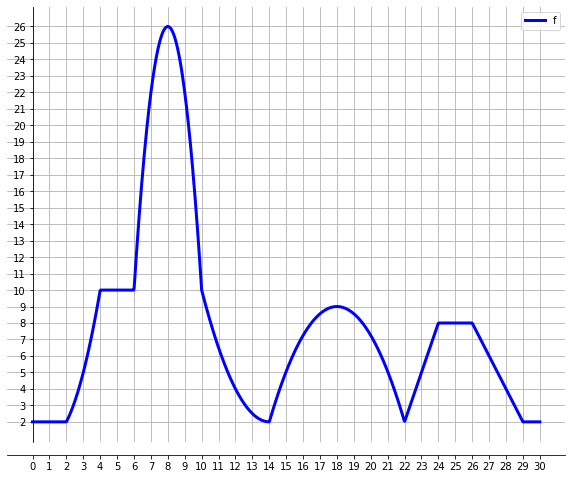

In [4]:
plot_f(f, 0, 30)

In [5]:
rs = np.random.RandomState(seed=42)

In [6]:
def hill_climbing(f, curr_s, step_size = 1, min_wall = None, max_wall = None):
    
    curr_states = []
    curr_fvalues = []
    
    while True:
    
        next_states = [curr_s-step_size, curr_s+step_size]
        
        if min_wall is not None and next_states[0] < min_wall:
            next_states = next_states[1:]
        
        if max_wall is not None and next_states[-1] > max_wall:
            next_states = next_states[:-1]

        curr_v = f(curr_s)
        
        curr_states.append(curr_s)
        curr_fvalues.append(curr_v)

        next_values = [f(v) for v in next_states]

        if curr_v >= np.max(next_values):
            return curr_s, curr_states, curr_fvalues
        else:
            i = np.argmax(next_values)
            curr_s = next_states[i]
    

In [7]:
initial_state = rs.random()*30
min_w = 0
max_w = 30

In [8]:
initial_state

11.236203565420874

In [9]:
curr_s, curr_states, curr_fvalues = hill_climbing(f, initial_state, step_size=0.1, min_wall=min_w, max_wall=max_w)

In [10]:
curr_s

8.036203565420886

In [11]:
def simulated_annealing(f, curr_s, T, temp_schedule, step_size = 1, min_wall = None, max_wall = None):
    
    curr_states = []
    curr_fvalues = []    

    for _ in range(1000):
        
        T = temp_schedule(T)
        
        #print("Temp", T)
        
        if T < 1:
            cs, css, cfs = hill_climbing(f, curr_s, step_size, min_wall, max_wall)
            return cs, curr_states+css, curr_fvalues+cfs

        
        
        curr_states.append(curr_s)
        
        
        if rs.random() > 0.5:
            next_s = curr_s + step_size
        else:
            next_s = curr_s - step_size
            
        if min_wall is not None and curr_s <= min_wall:
            next_s = curr_s + step_size
        
        if max_wall is not None and  curr_s >= max_wall:
            next_s = curr_s - step_size

        curr_v = f(curr_s)
        next_v = f(next_s)
        
        curr_fvalues.append(curr_v)

        diff = next_v - curr_v

        # maximize
        if diff > 0:
            curr_s = next_s
        else:
            p = 1/np.exp(-1*diff/T)
            #print(p)
            if p > rs.random():
                curr_s = next_s
                
    return curr_s, curr_states, curr_fvalues

In [12]:
def step_temp_schedule(T, step=1):
    return T - step

In [13]:
def exp_temp_schedule(T, decay=1.1):
    return T/decay

In [14]:
curr_s, curr_states, curr_fvalues = simulated_annealing(f, curr_s=initial_state, T=100, 
                                                        temp_schedule=exp_temp_schedule, step_size=0.1)

In [15]:
curr_s

8.036203565420886

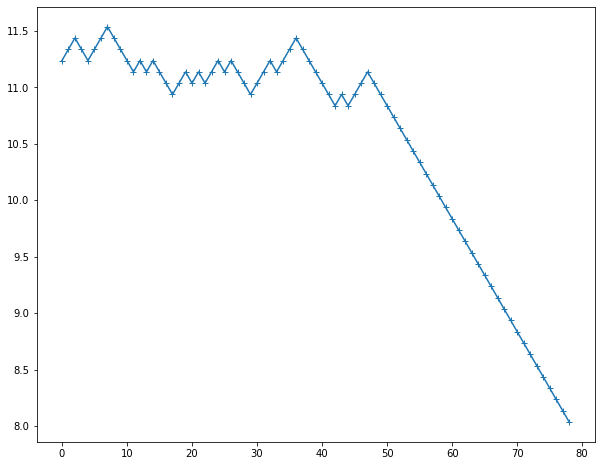

In [16]:
plt.plot(range(len(curr_states)), curr_states, marker='+')

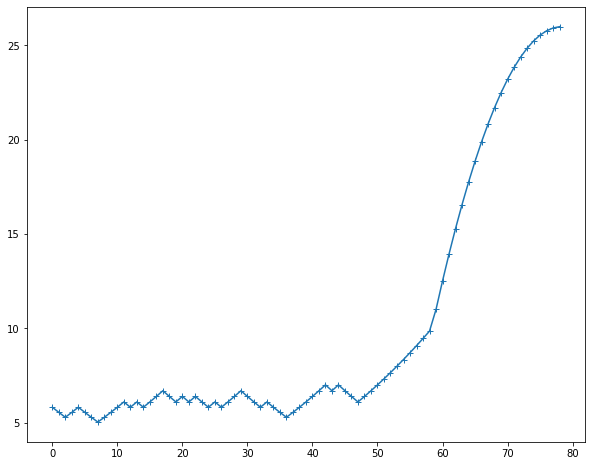

In [17]:
plt.plot(range(len(curr_fvalues)), curr_fvalues, marker='+')